In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

## Preguntas de investigación
1. ¿Qué relación existe entre el número de suscriptores y la cantidad de visualizaciones del canal?
    + ¿Muchos suscriptores se traduce en muchas visualizaciones?
    + Sería muy interesante saber si los que visualizan el contenido son todos suscriptores.
2. ¿La categoría del canal influye en la cantidad de suscriptores y las visualizaciones?
3. ¿La fecha de inicio del canal determina la cantidad de suscriptores?

### Procedimiento
1. Realizar operaciones de análisis de datos en el DataFrame del tipo:
    + Ordenar los canales por número de suscriptores de mayor a menor.
    + Encontrar el promedio, la mediana y la desviación estándar del número de suscriptores de los canales.
    + Filtrar los canales que tienen más de cierto número de suscriptores.
    + Agrupar los canales por país o categoría y encontrar el número promedio de suscriptores por grupo.
    + Encontrar los canales que tienen un crecimiento de suscriptores más rápido en un período de tiempo específico. 

In [5]:
# Importar dataset limpio
df_canales = pd.read_csv('C:\\Users\\Joako\\Desktop\\canales_youtube_suscriptores\\Datos_limpios\\canales_sin_na.csv')

In [6]:
df_canales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971 entries, 0 to 970
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rank         971 non-null    int64 
 1   youtuber     971 non-null    object
 2   subscribers  971 non-null    int64 
 3   video_views  971 non-null    int64 
 4   video_count  971 non-null    int64 
 5   category     971 non-null    object
 6   started      971 non-null    object
dtypes: int64(4), object(3)
memory usage: 53.2+ KB


In [7]:
# Ordenar los canales por número de suscriptores de mayor a menor
df_canales_sorted = df_canales.sort_values('subscribers', ascending=False)
print(df_canales_sorted)

     rank                    youtuber  subscribers   video_views  video_count   
0       1                    T-Series    222000000  198459090822        17317  \
1       3  Cocomelon - Nursery Rhymes    140000000  135481339848          786   
2       4                   SET India    139000000  125764252686        91271   
3       6                   PewDiePie    111000000   28469458228         4497   
4       7                     MrBeast    102000000   16832456681          726   
..    ...                         ...          ...           ...          ...   
966   996                    JP Plays     10900000    4609300218         3528   
967   997               TrapMusicHDTV     10900000    4070521973          690   
968   998                 Games EduUu     10900000    3093784767         1006   
969   999                       Hueva     10900000    3040301750          831   
970  1000              Dobre Brothers     10900000    2808411693          590   

           category     sta

In [8]:
df_canales_sorted.describe()

,rank,subscribers,video_views,video_count
count,971.000000,9.710000e+02,9.710000e+02,971.000000
mean,500.895984,2.023769e+07,9.325896e+09,8794.880536
std,287.079648,1.479116e+07,1.218934e+10,29761.056992
min,1.000000,1.090000e+07,4.390980e+05,1.000000
25%,252.500000,1.270000e+07,3.640473e+09,348.500000
50%,501.000000,1.550000e+07,6.165984e+09,908.000000
75%,747.500000,2.200000e+07,1.151038e+10,3160.500000
max,1000.000000,2.220000e+08,1.984591e+11,329711.000000


In [9]:
mediana = np.median(df_canales_sorted['subscribers'])
print(mediana)

15500000.0


insight:
mean suscriptores = 20,237,690.
desviación estandar suscriptores = 14,791,160 
mediana = 15,500,000
Es un desviación muy alta e implica que la distribución de suscriptores en los canales es bastante heterogénea, Es decir hay muchos canales con muchos suscriptores y muchos con poco suscriptores en relación a la media. No todos los 971 canales se agrupan en torno a la media. Adicionalmente esta heterogeneidad sugiere que la media esta siendo afectada por valores extremos y más bien entorno al 50% de los canales tienen unos 15,500,000 y el 75% de los canales tiene alrededor de 22,000,000 de suscriptores. 

Acciones: 
* Construir una escala para precisar cuales son los canales más top y aquellos que no lo son 

In [12]:
# escala de relevancia según suscriptores
p90 = np.percentile(df_canales_sorted['subscribers'], 90)
p75 = np.percentile(df_canales_sorted['subscribers'], 75)
p50 = np.percentile(df_canales_sorted['subscribers'], 50)
p25 = np.percentile(df_canales_sorted['subscribers'], 25)
p10 = np.percentile(df_canales_sorted['subscribers'], 10)

def categorizar(subs):
    if subs >= p90:
        return 'toptop'
    elif subs >= p75:
        return 'top'
    elif subs >= p50:
        return 'importantes'
    elif subs >= p25:
        return 'buenos'
    else:
        return 'normal'

df_canales_sorted['relevancia'] = df_canales_sorted['subscribers'].apply(categorizar)


In [13]:
df_canales_sorted.sample(10)

,rank,youtuber,subscribers,video_views,video_count,category,started,relevancia
169,177,DanTDM,26200000,18809615646,3603,Gaming,2012-01-01,top
270,281,Canal Canalha,20700000,1834293432,291,Comedy,2011-01-01,importantes
941,969,BakLol Video,11100000,3250851179,257,Entertainment,2016-01-01,normal
824,848,Planet Earth INDIA,11900000,1722795279,630,People & Blogs,2011-01-01,normal
331,345,Ninja Kidz TV,18700000,9145485770,267,Entertainment,2017-01-01,importantes
241,251,Venus Movies,22100000,6293790011,2456,Entertainment,2010-01-01,top
925,951,Fortnite,11200000,2123231155,792,Gaming,2014-01-01,normal
800,822,Más SKabeche,12100000,2746045885,632,Travel & Events,2015-01-01,normal
837,861,E-MasterSensei,11800000,3235532845,1151,Gaming,2016-01-01,normal
143,150,ashish chanchlani vines,28600000,4054589048,147,Comedy,2009-01-01,top


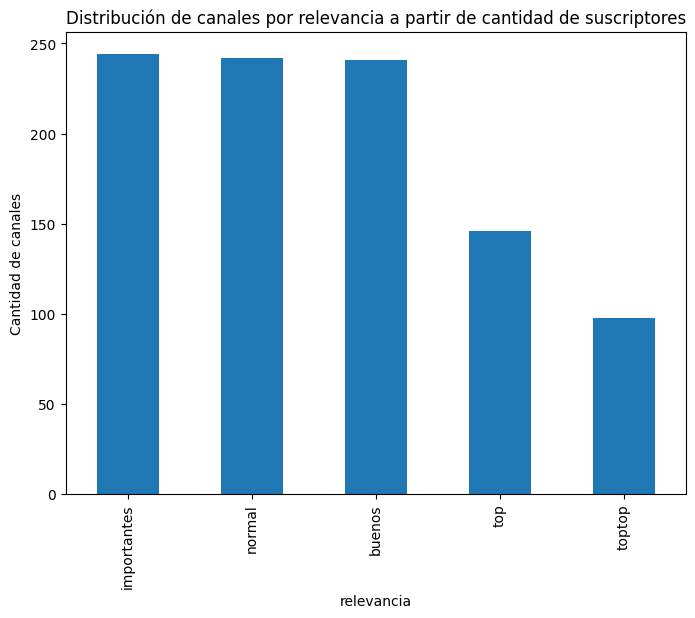

In [15]:
# Construir gráfico

df_canales_sorted['relevancia'].value_counts().plot(kind='bar', figsize=(8, 6))

# Personalizar la gráfica
plt.title('Distribución de canales por relevancia a partir de cantidad de suscriptores')
plt.xlabel('relevancia')
plt.ylabel('Cantidad de canales')
plt.show()
